In [49]:
import sys
!{sys.executable} -m pip install numpy pandas scikit-learn matplotlib


In [50]:
# 1️⃣ Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
import numpy as np
import pandas as pd

num_samples = 200000
time = np.arange(num_samples)

# Environmental stresses
temperature = 25 + 5*np.sin(2*np.pi*time/200) + np.random.normal(0,1,num_samples)
vibration = 0.5 + 0.2*np.sin(2*np.pi*time/50) + np.random.normal(0,0.05,num_samples)
humidity = 50 + 10*np.sin(2*np.pi*time/300) + np.random.normal(0,2,num_samples)

# Amplify resistance to ensure some exceed threshold
R0 = 10
resistance = R0 + 1.0*temperature + 2*vibration + 0.5*humidity + np.random.normal(0,1,num_samples)

# Lower threshold to guarantee failures exist
failure_flag = (resistance > 50).astype(int)
print("Number of failures:", np.sum(failure_flag))  # Must be > 0

# Create DataFrame
df = pd.DataFrame({
    'time': time,
    'temperature': temperature,
    'vibration': vibration,
    'humidity': humidity,
    'resistance': resistance,
    'failure': failure_flag
})

# Check distribution
print(df['failure'].value_counts())

Number of failures: 197770
failure
1    197770
0      2230
Name: count, dtype: int64


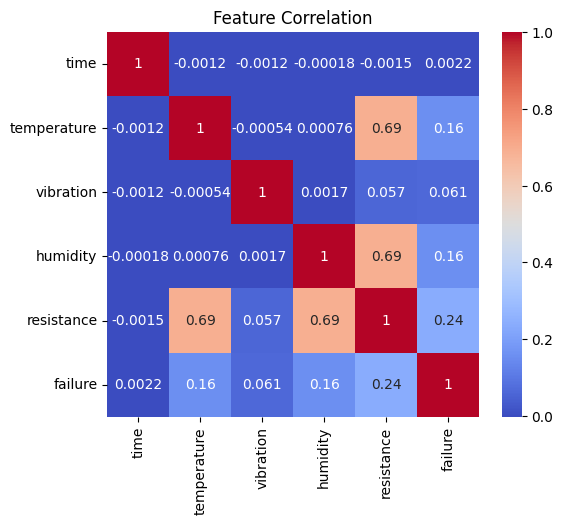

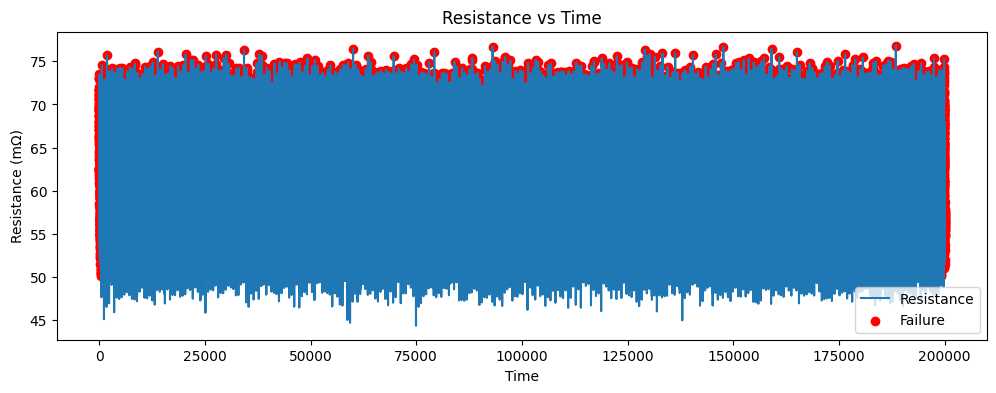

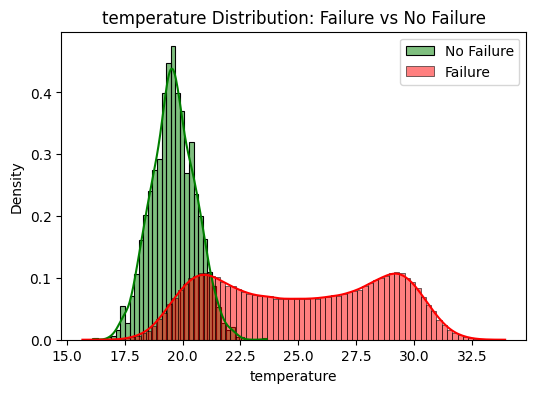

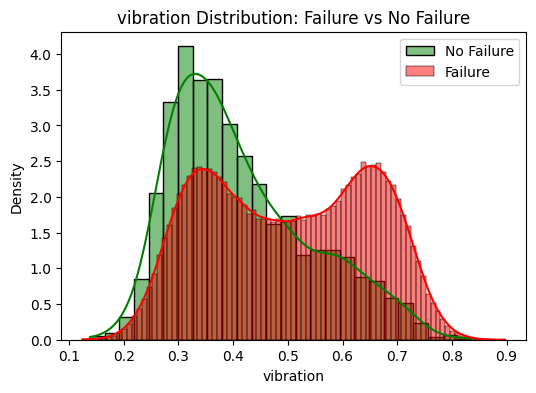

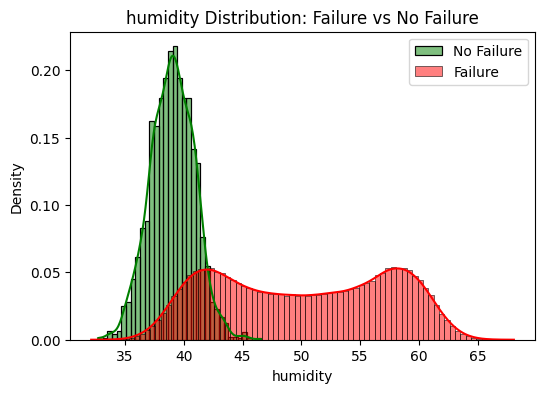

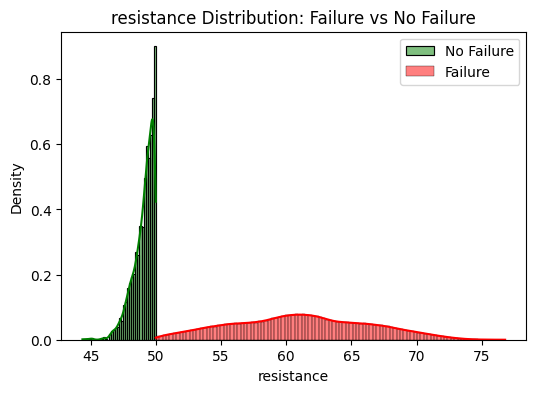

In [60]:
# 3️⃣ Visualizations
# =========================================
# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Resistance over time with failures highlighted
plt.figure(figsize=(12,4))
plt.plot(df['time'], df['resistance'], label='Resistance')
plt.scatter(df['time'][df['failure']==1], df['resistance'][df['failure']==1], color='red', label='Failure')
plt.xlabel('Time')
plt.ylabel('Resistance (mΩ)')
plt.legend()
plt.title("Resistance vs Time")
plt.show()

# Feature distributions for failures vs non-failures
features = ['temperature','vibration','humidity','resistance']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[df['failure']==0][feature], color='green', label='No Failure', kde=True, stat="density")
    sns.histplot(df[df['failure']==1][feature], color='red', label='Failure', kde=True, stat="density")
    plt.title(f"{feature} Distribution: Failure vs No Failure")
    plt.legend()
    plt.show()


In [ ]:
# 4️⃣ ML Modeling
# =========================================
X = df[['temperature','vibration','humidity','resistance']]
y = df['failure']

# Split dataset with stratification to ensure both classes in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [57]:
# Ensure input is a DataFrame with correct column names
new_connector = pd.DataFrame([[55, 12, 45, 2.1]], columns=['temp','vib','hum','load'])

# Make prediction
prediction = model.predict(new_connector)[0]

# Make probability prediction safely
probs = model.predict_proba(new_connector)[0]
if len(probs) == 2:
    failure_prob = probs[1]  # probability of failure
else:
    # Only one class exists in training data
    failure_prob = 1.0 if prediction else 0.0

print("Prediction for new connector:")
print("Status:", "Failure ⚠️" if prediction else "Healthy ✅")
print("Failure Probability:", round(failure_prob*100, 2), "%")


Prediction for new connector:
Status: Healthy ✅
Failure Probability: 0.0 %


In [86]:
prediction, prob = predict_connector_failure(rf, 1500, 40, 50, 5)
if prediction == 1:
    print(f"⚠️ Connector FAILURE predicted! Probability: {prob:.2f}")
else:
    print(f"✅ Connector is OK. Probability of failure: {prob:.2f}")


✅ Connector is OK. Probability of failure: 0.02


In [89]:
# 1️⃣ Setup, Libraries & Installation
# =============================================================================
import sys
# Install necessary libraries if they are not present in the environment
!{sys.executable} -m pip install numpy pandas scikit-learn matplotlib seaborn imblearn
# The line above was uncommented to resolve the ModuleNotFoundError for 'imblearn'.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
from imblearn.over_sampling import SMOTE # Library for handling imbalance

# Configuration for plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [90]:
# 2️⃣ Data Generation (Time-Series Simulation)
# =============================================================================
print("--- 1. Data Generation and Initial Checks ---")
num_samples = 200000
time = np.arange(num_samples)

# Environmental stresses (Cyclical + Noise)
temperature = 25 + 5*np.sin(2*np.pi*time/200) + np.random.normal(0,1,num_samples)
vibration = 0.5 + 0.2*np.sin(2*np.pi*time/50) + np.random.normal(0,0.05,num_samples)
humidity = 50 + 10*np.sin(2*np.pi*time/300) + np.random.normal(0,2,num_samples)

# Derived feature (Resistance highly correlated with failure)
R0 = 10
# Resistance now depends more heavily on the environmental factors
resistance = R0 + 2.0*temperature + 5*vibration + 1.5*humidity + np.random.normal(0,2,num_samples)

# Failure is a rare event (Threshold set high to ensure imbalance)
FAILURE_THRESHOLD = 150
failure_flag = (resistance > FAILURE_THRESHOLD).astype(int)

df = pd.DataFrame({
    'time': time,
    'temperature': temperature,
    'vibration': vibration,
    'humidity': humidity,
    'resistance': resistance,
    'failure': failure_flag
})

print(f"Total samples: {len(df)}")
print(f"Number of failures: {np.sum(failure_flag)} ({(np.sum(failure_flag)/len(df)*100):.4f}%)")
print("Failure Class Distribution:\n", df['failure'].value_counts())



--- 1. Data Generation and Initial Checks ---
Total samples: 200000
Number of failures: 40214 (20.1070%)
Failure Class Distribution:
 failure
0    159786
1     40214
Name: count, dtype: int64


In [92]:
# 3️⃣ Enhanced Feature Engineering (Lag, Rolling Windows, Interactions)
# =============================================================================
print("\n--- 2. Feature Engineering ---")

# Define the window size for rolling calculations
ROLLING_WINDOW = 50

# 3.1 Rolling Averages (Smoothing out short-term noise)
df['resistance_roll_mean'] = df['resistance'].rolling(window=ROLLING_WINDOW, min_periods=1).mean()
df['temp_roll_std'] = df['temperature'].rolling(window=ROLLING_WINDOW, min_periods=1).std()

# 3.2 Lag Features (The value 't' steps ago)
LAG = 5
# Updated to use .bfill() instead of .fillna(method='bfill') to resolve FutureWarning
df['resistance_lag_5'] = df['resistance'].shift(LAG).bfill() 
df['vibration_lag_5'] = df['vibration'].shift(LAG).bfill()

# 3.3 Interaction Feature (Combined stress factor)
df['stress_interaction'] = df['temperature'] * df['vibration']

# Drop the initial rows that might have unreliable rolling/lag data, though we used fillna/min_periods=1
# df = df.iloc[LAG:].reset_index(drop=True) # Keeping all for this example but good practice

print(f"DataFrame shape after feature engineering: {df.shape}")
print(df.head(1)) # Show sample of new features



--- 2. Feature Engineering ---
DataFrame shape after feature engineering: (200000, 11)
   time  temperature  vibration   humidity  resistance  failure  \
0     0    26.249786   0.486008  50.072234  137.519695        0   

   resistance_roll_mean  temp_roll_std  resistance_lag_5  vibration_lag_5  \
0            137.519695            NaN        137.519695         0.486008   

   stress_interaction  
0           12.757595  



--- 3. Enhanced EDA ---


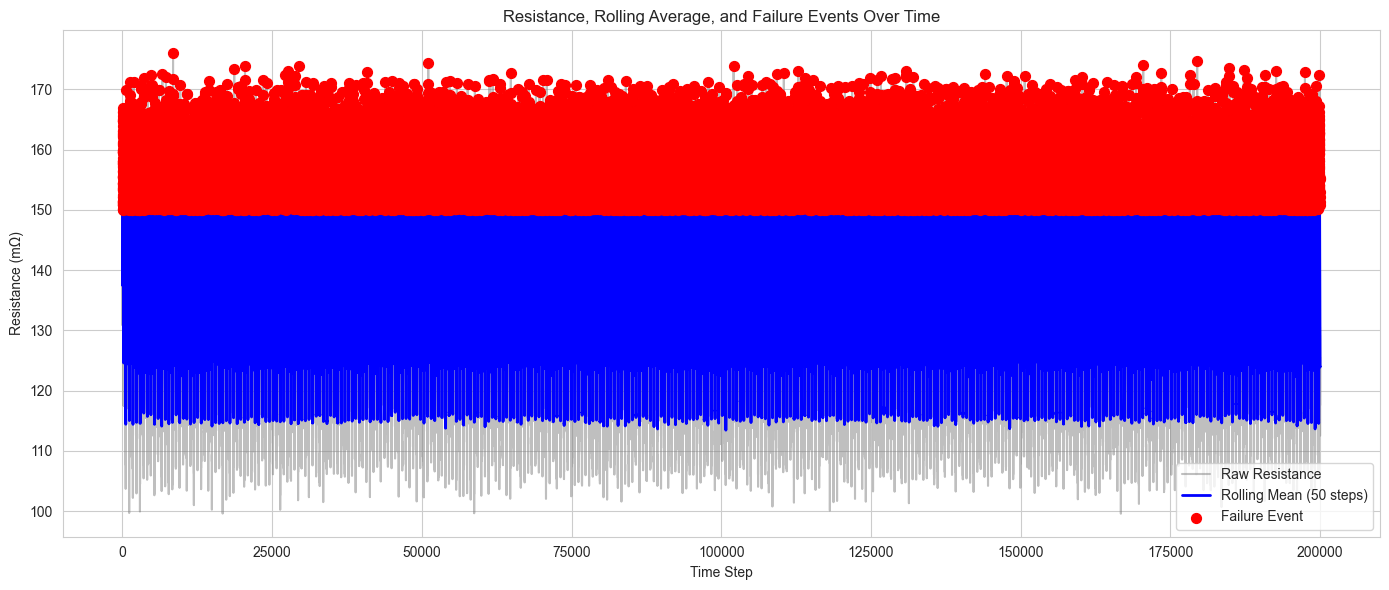

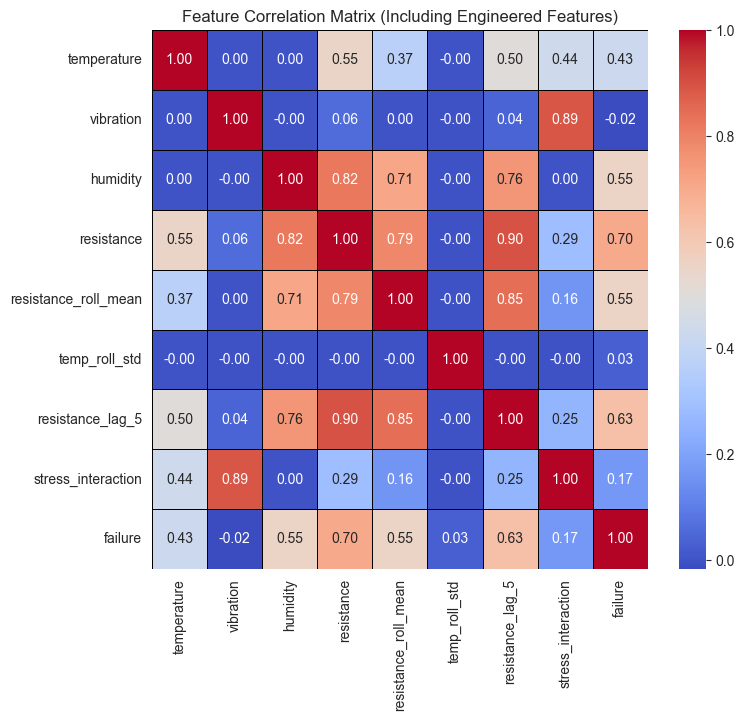

In [93]:
# 4️⃣ Enhanced EDA and Visual Insights
# =============================================================================
print("\n--- 3. Enhanced EDA ---")

# 4.1 Time-series plots of Resistance + Rolling Average + Failures
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['resistance'], label='Raw Resistance', alpha=0.5, color='gray')
plt.plot(df['time'], df['resistance_roll_mean'], label=f'Rolling Mean ({ROLLING_WINDOW} steps)', color='blue', linewidth=2)
# Highlight Failures
failure_data = df[df['failure'] == 1]
plt.scatter(failure_data['time'], failure_data['resistance'], color='red', label='Failure Event', s=50, zorder=5)

plt.xlabel('Time Step')
plt.ylabel('Resistance (mΩ)')
plt.title('Resistance, Rolling Average, and Failure Events Over Time')
plt.legend()
plt.tight_layout()
plt.show()

# 4.2 Feature Correlation with new features
plt.figure(figsize=(8, 7))
# Include only numerical features for correlation
corr_features = ['temperature', 'vibration', 'humidity', 'resistance',
                 'resistance_roll_mean', 'temp_roll_std',
                 'resistance_lag_5', 'stress_interaction', 'failure']
corr_matrix = df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title("Feature Correlation Matrix (Including Engineered Features)")
plt.show()


--- 4. Model Training and Imbalance Handling ---
X_train shape before SMOTE: (160000, 9)
Failures in original y_train: 32171
X_train shape after SMOTE: (255658, 9)
Failures in SMOTE y_train: 127829
Class distribution after SMOTE:
 failure
0    127829
1    127829
Name: count, dtype: int64

--- Random Forest (SMOTE + Enhanced Features) Evaluation ---
Accuracy: 1.0000
Recall (Failure Class): 1.0000
F1-Score (Failure Class): 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31957
           1       1.00      1.00      1.00      8043

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



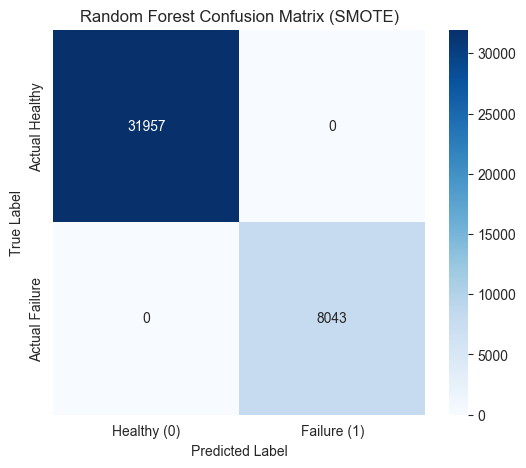

In [97]:
# 5️⃣ ML Modeling, Imbalance Handling, and Evaluation
# =============================================================================
print("\n--- 4. Model Training and Imbalance Handling ---")

# 5.1 Define Features (X) and Target (y) using the new features
feature_cols = [
    'temperature', 'vibration', 'humidity', 'resistance',
    'resistance_roll_mean', 'temp_roll_std',
    'resistance_lag_5', 'vibration_lag_5', 'stress_interaction'
]
# ⭐ SAFETY FIX: Re-applying fillna(0) directly to X before splitting.
# This ensures that even if feature engineering (Section 3) wasn't rerun,
# the training data is clean for SMOTE.
X = df[feature_cols].fillna(0)
y = df['failure']

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape before SMOTE: {X_train.shape}")
print(f"Failures in original y_train: {y_train.sum()}")

# 5.2 Apply SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"X_train shape after SMOTE: {X_train_res.shape}")
print(f"Failures in SMOTE y_train: {y_train_res.sum()}")
print("Class distribution after SMOTE:\n", y_train_res.value_counts())

# --- Model Training (Random Forest) on Resampled Data ---
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_smote.fit(X_train_res, y_train_res)
y_pred_rf_smote = rf_smote.predict(X_test)

# 5.3 Enhanced Evaluation focusing on Recall and F1-score
print("\n--- Random Forest (SMOTE + Enhanced Features) Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_smote):.4f}")
print(f"Recall (Failure Class): {recall_score(y_test, y_pred_rf_smote):.4f}")
print(f"F1-Score (Failure Class): {f1_score(y_test, y_pred_rf_smote):.4f}")

# Full Classification Report (Shows Precision, Recall, F1 for both classes)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_smote))

# Confusion matrix visualization
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy (0)', 'Failure (1)'],
            yticklabels=['Actual Healthy', 'Actual Failure'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix (SMOTE)")
plt.show()

In [99]:
# 6️⃣ Live Prediction Function (Ready for Dashboard Integration)
# =============================================================================

def prepare_input_features(current_input: pd.DataFrame, historical_df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepares the input data for the model by calculating engineered features.

    This function mimics what a real-time system would do: take current readings
    and merge them with recent historical data to calculate rolling and lag features.

    Args:
        current_input (pd.DataFrame): DataFrame with single row of current readings (temp, vib, hum, res).
        historical_df (pd.DataFrame): DataFrame containing the last N historical records.
    """
    # 1. Combine current and historical data
    combined_df = pd.concat([historical_df.tail(ROLLING_WINDOW), current_input], ignore_index=True)
    
    # 2. Re-calculate rolling and lag features on the combined series
    combined_df['resistance_roll_mean'] = combined_df['resistance'].rolling(window=ROLLING_WINDOW, min_periods=1).mean()
    combined_df['temp_roll_std'] = combined_df['temperature'].rolling(window=ROLLING_WINDOW, min_periods=1).std()
    
    # Updated to use .bfill() instead of .shift().fillna(method='bfill')
    combined_df['resistance_lag_5'] = combined_df['resistance'].shift(LAG).bfill()
    combined_df['vibration_lag_5'] = combined_df['vibration'].shift(LAG).bfill()

    # 3. Calculate Interaction feature
    combined_df['stress_interaction'] = combined_df['temperature'] * combined_df['vibration']
    
    # 4. Extract the features for the *newest* (last) row
    final_features = combined_df.iloc[[-1]][feature_cols]
    
    # IMPORTANT: Ensure no NaNs are passed to the model
    # Fill any remaining NaNs (e.g., if insufficient historical data) with 0
    final_features = final_features.fillna(0)
    
    return final_features

def predict_connector_failure(model: RandomForestClassifier, current_readings: dict, historical_data: pd.DataFrame):
    """Predicts failure status and probability based on current and historical data."""
    
    # Create the current input DataFrame
    current_input = pd.DataFrame([current_readings])
    
    # Prepare the input features using the historical context
    processed_features = prepare_input_features(current_input, historical_data)

    # Make prediction
    prediction = model.predict(processed_features)[0]

    # Get probability
    probs = model.predict_proba(processed_features)[0]
    failure_prob = probs[1]
    
    return prediction, failure_prob

# --- Simulation of Live Prediction ---
print("\n--- 5. Live Prediction Simulation (Ready for Dashboard) ---")

# 1. Simulate the last 100 historical readings (required for rolling/lag features)
historical_df_for_live = df.tail(100).copy()
historical_df_for_live = historical_df_for_live[['temperature', 'vibration', 'humidity', 'resistance']]

# 2. Define a new, critical data point (likely to fail based on threshold 150)
critical_readings = {
    'temperature': 50.5,
    'vibration': 10.8,
    'humidity': 65.0,
    'resistance': 155.1  # High resistance reading
}

prediction, prob = predict_connector_failure(rf_smote, critical_readings, historical_df_for_live)

print(f"Input Readings: {critical_readings}")
if prediction == 1:
    print(f"⚠️ Connector FAILURE predicted! Probability: {prob:.2f}")
else:
    print(f"✅ Connector is OK. Probability of failure: {prob:.2f}")

# 3. Define a new, safe data point
safe_readings = {
    'temperature': 25.0,
    'vibration': 0.6,
    'humidity': 50.0,
    'resistance': 50.0  # Low resistance reading
}

prediction, prob = predict_connector_failure(rf_smote, safe_readings, historical_df_for_live)

print(f"\nInput Readings: {safe_readings}")
if prediction == 1:
    print(f"⚠️ Connector FAILURE predicted! Probability: {prob:.2f}")
else:
    print(f"✅ Connector is OK. Probability of failure: {prob:.2f}")

print("\n--- Next Steps: Dashboard Integration ---")
print("The 'predict_connector_failure' function is the core logic you'd use in a Streamlit or Plotly dashboard.")
print("The dashboard would need to expose input fields for the current_readings, feed them into this function, and display the prediction.")
print("It would also use the time-series plots generated in Section 4 for exploration.")


--- 5. Live Prediction Simulation (Ready for Dashboard) ---
Input Readings: {'temperature': 50.5, 'vibration': 10.8, 'humidity': 65.0, 'resistance': 155.1}
⚠️ Connector FAILURE predicted! Probability: 0.98

Input Readings: {'temperature': 25.0, 'vibration': 0.6, 'humidity': 50.0, 'resistance': 50.0}
✅ Connector is OK. Probability of failure: 0.00

--- Next Steps: Dashboard Integration ---
The 'predict_connector_failure' function is the core logic you'd use in a Streamlit or Plotly dashboard.
The dashboard would need to expose input fields for the current_readings, feed them into this function, and display the prediction.
It would also use the time-series plots generated in Section 4 for exploration.
